<a href="https://colab.research.google.com/github/alizehadeel/AI-ML-Notebook/blob/main/MultiLabelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset

In [19]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"alizehadeel","key":"a967484beac04826fa3b66060c694b64"}'}

In [20]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
!cp kaggle.json ~/.kaggle/


In [22]:
!chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d meherunnesashraboni/multi-label-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/meherunnesashraboni/multi-label-image-classification-dataset
License(s): ODC Public Domain Dedication and Licence (PDDL)
multi-label-image-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
!unzip multi-label-image-classification-dataset.zip -d multi_label_dataset

Archive:  multi-label-image-classification-dataset.zip
replace multi_label_dataset/multilabel_modified/images/image1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace multi_label_dataset/multilabel_modified/images/image10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Connecting to drive

In [25]:
from google.colab import drive
drive.mount('/content/drive') #Create a folder named drive inside /content, and link it (mount it) to my Google Drive account

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#/content/drive/MyDrive/  Inside that mounted folder, Colab mirrors your actual Google Drive structure:
#This MyDrive folder is literally your main Google Drive (the same one you see on drive.google.com).
#So if you had a folder in Drive like: MyDrive/kaggle_datasets/data.csv
#You can now access it in Colab as: '/content/drive/MyDrive/kaggle_datasets/data.csv'

In [27]:
#!ls /content/drive/MyDrive #this is mirroring my drive


In [28]:
!ls

 drive		    multi_label_dataset
'kaggle (1).json'   multi-label-image-classification-dataset.zip
 kaggle.json	    sample_data


In [29]:
!ls multi_label_dataset

multilabel_modified


In [30]:
!ls multi_label_dataset/multilabel_modified/

 images
'multilabel_classification(2).csv'
'multilabel_classification(6)-reduced_modified.csv'
'multilabel_classification(7).csv'
 multilabel_classification.csv


In [31]:
#to see which of the csv to use
import pandas as pd

# View first few rows of each CSV
for name in [
    "multilabel_classification.csv",
    "multilabel_classification(2).csv",
    "multilabel_classification(6)-reduced_modified.csv",
    "multilabel_classification(7).csv"
]:
    print(f"--- {name} ---")
    path = f"/content/multi_label_dataset/multilabel_modified/{name}"
    df = pd.read_csv(path)
    print(df.head(), "\n")


--- multilabel_classification.csv ---
      Column1       Column2
0  Image_Name       Classes
1  image0.jpg              
2  image1.jpg    bus person
3  image2.jpg         sitar
4  image3.jpg        flutes 

--- multilabel_classification(2).csv ---
   Image_Name  \
0  image1.jpg   
1  image2.jpg   
2  image3.jpg   
3  image4.jpg   
4  image5.jpg   

   Classes(motorcycle, truck, boat, bus, cycle, person, desert, mountains, sea, sunset, trees, sitar, ektara, flutes, tabla, harmonium)  \
0                                         bus person                                                                                      
1                                              sitar                                                                                      
2                                             flutes                                                                                      
3                                          bus trees                                        

# Preprocessing Data

In [32]:
import os
import pandas as pd

base_path='/content/multi_label_dataset/multilabel_modified'
images_path=base_path+'/images'
labels_path=base_path+ '/multilabel_classification(2).csv'

df=pd.read_csv(labels_path)
df.head()


,Image_Name,"Classes(motorcycle, truck, boat, bus, cycle, person, desert, mountains, sea, sunset, trees, sitar, ektara, flutes, tabla, harmonium)",motorcycle,truck,boat,bus,cycle,person,desert,mountains,sea,sunset,trees,sitar,ektara,flutes,tabla,harmonium
0,image1.jpg,bus person,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,image2.jpg,sitar,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,image3.jpg,flutes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,image4.jpg,bus trees,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,image5.jpg,bus,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split

train_df, temp_df=train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df=train_test_split(temp_df, test_size=0.5, random_state=42)

print("Train shape:" + str(train_df.shape))
print("Validation shape:" + str(val_df.shape))
print("Test shape:" + str(test_df.shape))

Train shape:(6277, 18)
Validation shape:(1345, 18)
Test shape:(1346, 18)


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255)#multiply each pixel with 1/255 to rescale
img_size=[128, 128]


In [35]:
#this is where your data (images + labels) finally get connected and prepared for training.
train_gen=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=images_path,
    x_col='Image_Name',
    y_col=list(train_df.columns[2:]),
    target_size=img_size,
    class_mode='raw',
    batch_size=32,
    shuffle=True
)

val_gen=datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=images_path,
    x_col='Image_Name',
    y_col=list(val_df.columns[2:]),
    target_size=img_size,
    class_mode='raw',
    batch_size=32,
    shuffle=True
)
# How DataFrame connects to actual image files
# The DataFrame has only filenames like "image1.jpg"
# The 'directory' parameter gives the folder path where these files exist
# The generator automatically joins them:
#    full_path = directory + "/" + Image_Name
# Example:
#    "/content/multi_label_dataset/images/" + "image1.jpg"
# → "/content/multi_label_dataset/images/image1.jpg"
# That’s how it finds and loads each image file.

# 🔹 Step 4: Label handling
# y_col=list(train_df.columns[2:]) selects all column names after the first two
# These are your multi-hot label columns (0s and 1s for each class).

# The generator yields batches of:
#    X_batch → images (as NumPy arrays)
#    y_batch → their multi-label vectors
# Shapes example:
#    X_batch: (32, 128, 128, 3)
#    y_batch: (32, 15)
# The model receives these directly during training.

Found 5476 validated image filenames.
Found 1182 validated image filenames.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 801 invalid image filename(s) in x_col="Image_Name". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 163 invalid image filename(s) in x_col="Image_Name". These filename(s) will be ignored.
  warnings.warn(


# ANN

In [36]:
from tensorflow.keras import layers, models

model=models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_df.shape[1]-2, activation='sigmoid')#final output layer size is the number of classes that we have-2(class names and image column)

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
#The optimizer decides how the model updates its weights during training.
#Adam (Adaptive Moment Estimation) is very popular because: it automatically adjusts learning rates.

#Metrics are what you want to monitor and print during training.
model.summary()

#(49,152 inputs×256 neurons)+256 biases=12,583,168

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,618,128 (48.13 MB)

 Trainable params: 12,618,128 (48.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history=model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)
#Goes through all training batches epochs times.
#After each epoch, checks performance on val_gen (data the model hasn’t seen).
#Stores training progress (loss and accuracy) in a history object.

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 101s 574ms/step - accuracy: 0.1633 - loss: 1.2422 - val_accuracy: 0.3181 - val_loss: 0.3314
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 89s 518ms/step - accuracy: 0.3130 - loss: 0.3212 - val_accuracy: 0.2944 - val_loss: 0.3079
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 98s 566ms/step - accuracy: 0.3407 - loss: 0.2899 - val_accuracy: 0.2343 - val_loss: 0.2825
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 87s 507ms/step - accuracy: 0.3561 - loss: 0.2725 - val_accuracy: 0.3393 - val_loss: 0.2888
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 84s 488ms/step - accuracy: 0.3754 - loss: 0.2656 - val_accuracy: 0.3536 - val_loss: 0.2938
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 86s 499ms/step - accuracy: 0.3962 - loss: 0.2536 - val_accuracy: 0.4120 - val_loss: 0.2699
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 87s 508ms/step - accuracy: 0.4231 - loss: 0.2430 - val_accuracy: 0.4729 - val_loss: 0.2590
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 83s 484ms/step - accuracy: 0.4163 - loss: 

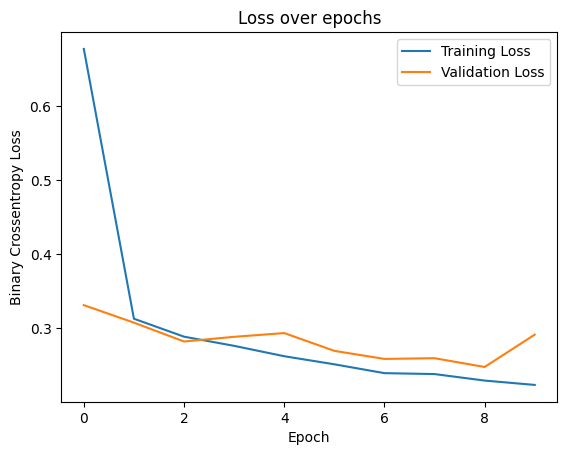

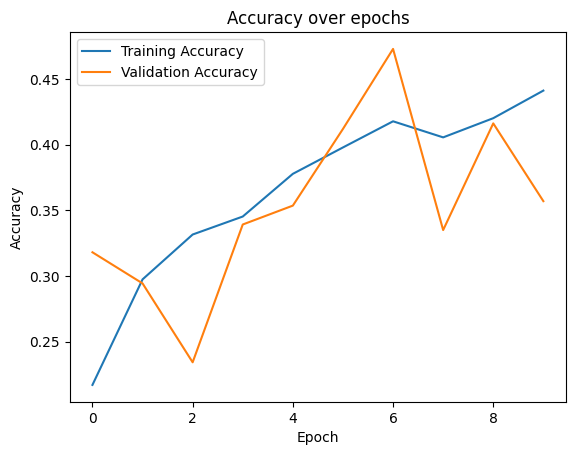

In [38]:
import matplotlib.pyplot as plt

# 📊 Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()

# 📈 Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# CNN

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

img_size=[128, 128, 3]

cnn_model=Sequential([#Sequential means the model is a linear stack of layers — each layer feeds directly into the next (no branching).We’re building a pipeline step by step.
    Conv2D(32, (3,3), activation='relu', input_shape=img_size),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', input_shape=img_size),#Each filter learns more complex features 32->64(e.g., shapes, patterns).
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),#to remove negative values
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_df.shape[1]-2, activation='sigmoid')

])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # because multi-label
    metrics=['accuracy']
)

history_cnn = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,      # increase to 20–30 for better learning
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'train_df' is not defined